In [2]:
!pip install scipy
!pip install matplotlib
!pip install numpy

## Ekspresi Aktivator promoter terinduksi garam

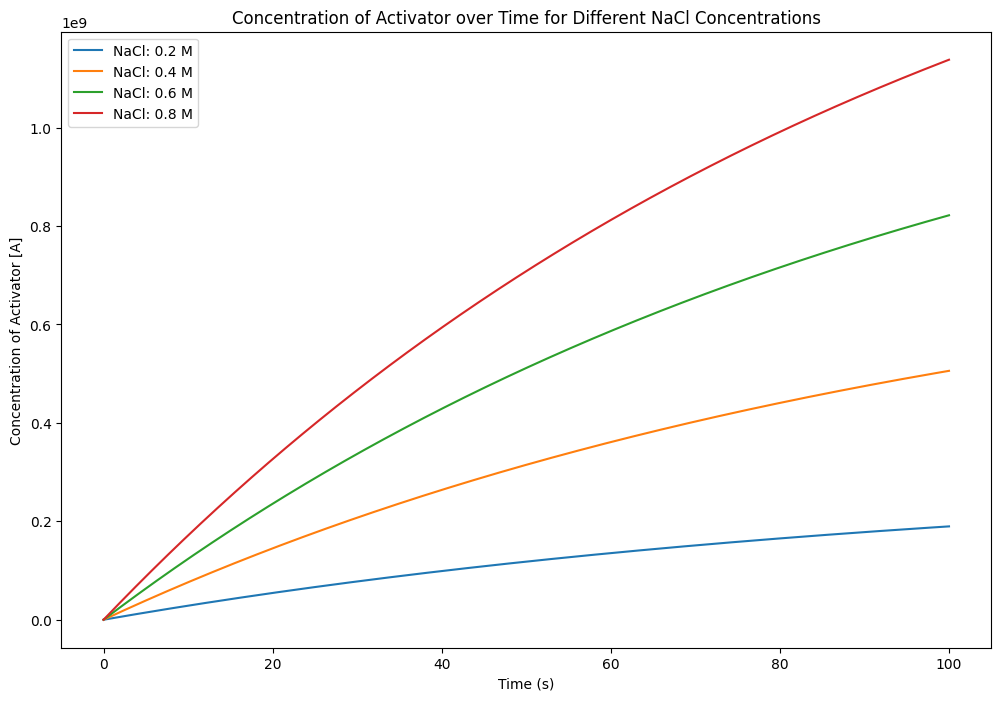

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter
alpha = 50          # mM^-1
N_P = 5             # Jumlah maksimal TF yang bisa berikatan dengan promoter
N_C = 10            # Jumlah kompleks TF lain yang bisa terbentuk
k_on = 1e5          # M^-1 s^-1 (konstanta asosiasi untuk binding TF ke promoter)
k_off = 1e-2        # s^-1 (konstanta disosiasi TF dari promoter)
k_C_on = 1e5        # M^-1 s^-1 (konstanta asosiasi untuk kompleks TF lain)
k_C_off = 1e-2      # s^-1 (konstanta disosiasi kompleks TF lain)
r = 10              # molekul/s (laju transkripsi)
gamma = 0.01        # s^-1 (laju degradasi mRNA)
P_n_m_t = 1         # Probabilitas simplifikasi (dianggap konstan)

# Konsentrasi NaCl dalam Molar
NaCl_concentrations = [0.2, 0.4, 0.6, 0.8]  # dalam Molar

# Fungsi untuk menghitung laju perubahan probabilitas dan konsentrasi aktivator
def model(y, t, NaCl):
    # Variabel yang dihitung
    A = y  # Konsentrasi aktivator [A]

    # Hitung N_TF berdasarkan konsentrasi NaCl
    N_TF = alpha * NaCl  # N_TF = alpha * [NaCl]

    # Hitung laju perubahan probabilitas berdasarkan persamaan dP(n, m, t) / dt
    # Disederhanakan menjadi laju produksi (r * P_n_m_t) untuk mempermudah
    dP_dt = (
        k_on * (N_TF - N_P + 1) * (N_P) - k_off * (N_P + 1)
        + r * P_n_m_t
    )

    # Hitung laju perubahan aktivator berdasarkan persamaan translasi
    dA_dt = dP_dt - gamma * A

    return dA_dt

# Inisialisasi variabel awal untuk konsentrasi aktivator
A_initial = 0  # Asumsikan awalnya konsentrasi aktivator adalah 0

# Waktu simulasi
t = np.linspace(0, 100, 1000)  # 1000 titik waktu dari 0 sampai 100 detik

# Menyimpan hasil untuk setiap konsentrasi NaCl
results = []

for NaCl in NaCl_concentrations:
    # Integrasi ODE untuk setiap konsentrasi NaCl
    sol = odeint(model, A_initial, t, args=(NaCl,))
    results.append(sol)

# Visualisasi hasil
plt.figure(figsize=(12, 8))

for i, NaCl in enumerate(NaCl_concentrations):
    plt.plot(t, results[i], label=f'NaCl: {NaCl} M')  # Plotting konsentrasi aktivator

plt.xlabel('Time (s)')
plt.ylabel('Concentration of Activator [A]')
plt.title('Concentration of Activator over Time for Different NaCl Concentrations')
plt.legend()
plt.show()


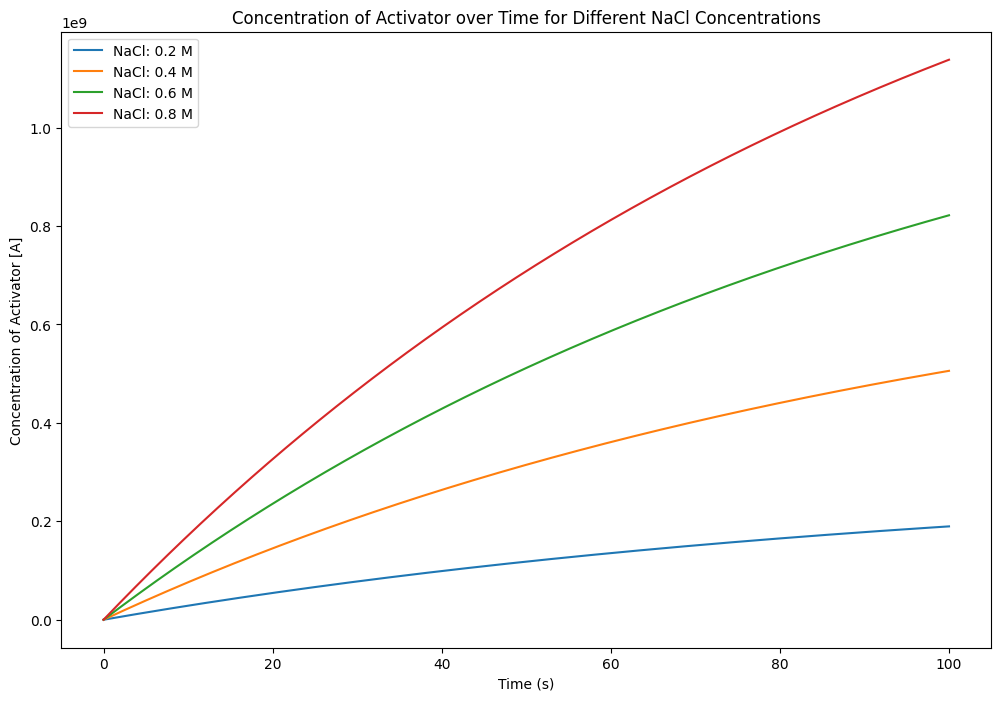

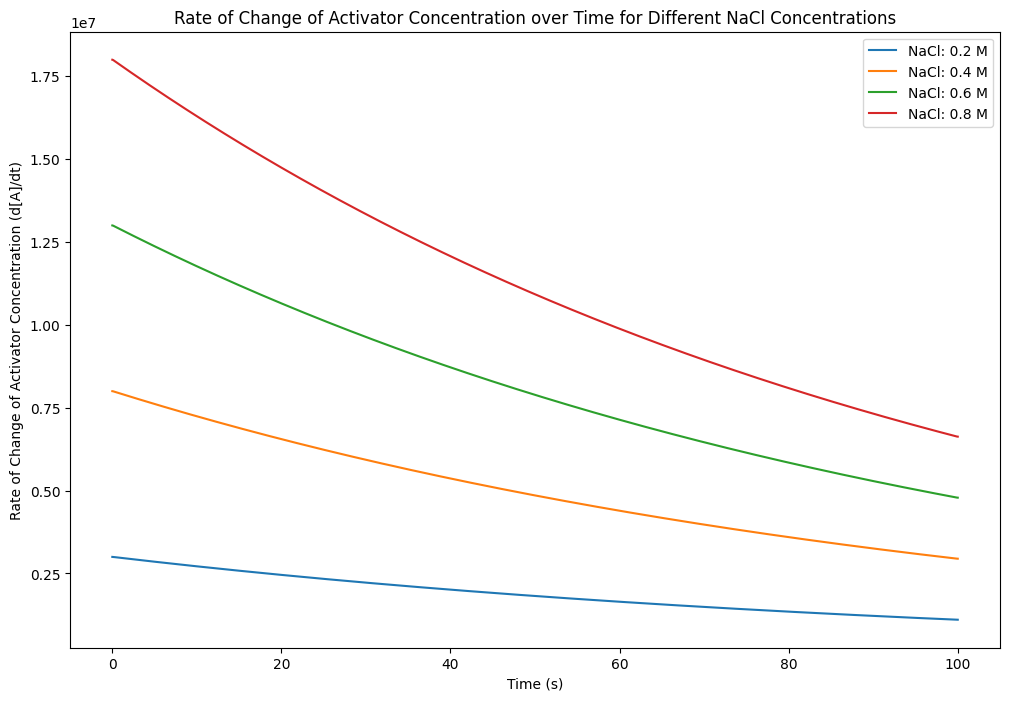

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter
alpha = 50          # mM^-1
N_P = 5             # Jumlah maksimal TF yang bisa berikatan dengan promoter
N_C = 10            # Jumlah kompleks TF lain yang bisa terbentuk
k_on = 1e5          # M^-1 s^-1 (konstanta asosiasi untuk binding TF ke promoter)
k_off = 1e-2        # s^-1 (konstanta disosiasi TF dari promoter)
k_C_on = 1e5        # M^-1 s^-1 (konstanta asosiasi untuk kompleks TF lain)
k_C_off = 1e-2      # s^-1 (konstanta disosiasi kompleks TF lain)
r = 10              # molekul/s (laju transkripsi)
gamma = 0.01        # s^-1 (laju degradasi mRNA)
P_n_m_t = 1         # Probabilitas simplifikasi (dianggap konstan)

# Konsentrasi NaCl dalam Molar
NaCl_concentrations = [0.2, 0.4, 0.6, 0.8]  # dalam Molar

# Fungsi untuk menghitung laju perubahan probabilitas dan konsentrasi aktivator
def model(y, t, NaCl):
    A = y  # Konsentrasi aktivator [A]

    # Hitung N_TF berdasarkan konsentrasi NaCl
    N_TF = alpha * NaCl  # N_TF = alpha * [NaCl]

    # Hitung laju perubahan probabilitas berdasarkan persamaan dP(n, m, t) / dt
    dP_dt = (
        k_on * (N_TF - N_P + 1) * (N_P) - k_off * (N_P + 1)
        + r * P_n_m_t
    )

    # Hitung laju perubahan aktivator berdasarkan persamaan translasi
    dA_dt = dP_dt - gamma * A

    return dA_dt

# Inisialisasi variabel awal untuk konsentrasi aktivator
A_initial = 0  # Asumsikan awalnya konsentrasi aktivator adalah 0

# Waktu simulasi
t = np.linspace(0, 100, 1000)  # 1000 titik waktu dari 0 sampai 100 detik

# Menyimpan hasil untuk setiap konsentrasi NaCl
results = []
rates = []

for NaCl in NaCl_concentrations:
    # Integrasi ODE untuk setiap konsentrasi NaCl
    sol = odeint(model, A_initial, t, args=(NaCl,))
    results.append(sol)

    # Hitung laju perubahan (dA/dt) per detik untuk setiap titik waktu
    rate = np.gradient(sol[:, 0], t)  # Menghitung laju sebagai turunan numerik
    rates.append(rate)

# Visualisasi konsentrasi aktivator
plt.figure(figsize=(12, 8))

for i, NaCl in enumerate(NaCl_concentrations):
    plt.plot(t, results[i], label=f'NaCl: {NaCl} M')  # Plotting konsentrasi aktivator

plt.xlabel('Time (s)')
plt.ylabel('Concentration of Activator [A]')
plt.title('Concentration of Activator over Time for Different NaCl Concentrations')
plt.legend()
plt.show()

# Visualisasi laju perubahan konsentrasi aktivator per detik
plt.figure(figsize=(12, 8))

for i, NaCl in enumerate(NaCl_concentrations):
    plt.plot(t, rates[i], label=f'NaCl: {NaCl} M')  # Plotting laju perubahan

plt.xlabel('Time (s)')
plt.ylabel('Rate of Change of Activator Concentration (d[A]/dt)')
plt.title('Rate of Change of Activator Concentration over Time for Different NaCl Concentrations')
plt.legend()
plt.show()


In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter
alpha = 50          # mM^-1
N_P = 5             # Jumlah maksimal TF yang bisa berikatan dengan promoter
N_C = 10            # Jumlah kompleks TF lain yang bisa terbentuk
k_on = 1e5          # M^-1 s^-1 (konstanta asosiasi untuk binding TF ke promoter)
k_off = 1e-2        # s^-1 (konstanta disosiasi TF dari promoter)
k_C_on = 1e5        # M^-1 s^-1 (konstanta asosiasi untuk kompleks TF lain)
k_C_off = 1e-2      # s^-1 (konstanta disosiasi kompleks TF lain)
r = 10              # molekul/s (laju transkripsi)
gamma = 0.01        # s^-1 (laju degradasi mRNA)
P_n_m_t = 1         # Probabilitas simplifikasi (dianggap konstan)

# Konsentrasi NaCl dalam Molar
NaCl_concentrations = [0.2, 0.4, 0.6, 0.8]  # dalam Molar

# Fungsi untuk menghitung laju perubahan aktivator
def transcription_rate(NaCl):
    # Hitung N_TF berdasarkan konsentrasi NaCl
    N_TF = alpha * NaCl  # N_TF = alpha * [NaCl]

    # Hitung laju transkripsi berdasarkan dP/dt
    dP_dt = (
        k_on * (N_TF - N_P + 1) * (N_P) - k_off * (N_P + 1)
        + r * P_n_m_t
    )

    # Konversi ke µM/s (1 M = 1e6 µM)
    dP_dt_uM = dP_dt * 1e6
    return dP_dt_uM

# Hitung dan tampilkan laju transkripsi per detik untuk setiap konsentrasi NaCl dalam µM/s dengan format pangkat
print("Laju Transkripsi (µM/s) untuk setiap konsentrasi NaCl:")
for NaCl in NaCl_concentrations:
    rate = transcription_rate(NaCl)
    print(f"Konsentrasi NaCl: {NaCl} M, Laju Transkripsi: {rate:.2e} µM/s")


Laju Transkripsi (µM/s) untuk setiap konsentrasi NaCl:
Konsentrasi NaCl: 0.2 M, Laju Transkripsi: 3.00e+12 µM/s
Konsentrasi NaCl: 0.4 M, Laju Transkripsi: 8.00e+12 µM/s
Konsentrasi NaCl: 0.6 M, Laju Transkripsi: 1.30e+13 µM/s
Konsentrasi NaCl: 0.8 M, Laju Transkripsi: 1.80e+13 µM/s


## Ekspresi GOI promoter sintetik

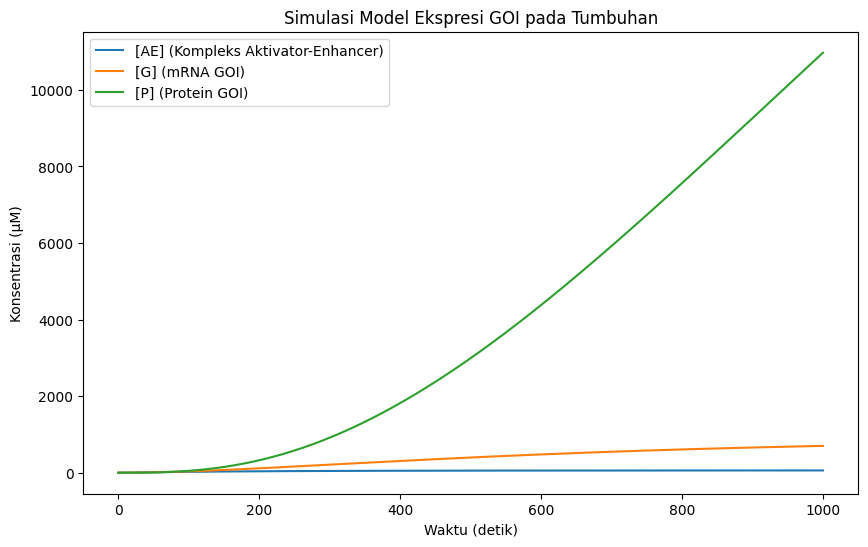

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameter model
k_on = 3         # 1/µM·s
k_off = 0.005       # 1/s
k2 = 0.03           # 1/s
d_G = 0.002         # 1/s
k3 = 0.04           # 1/s
d_P = 0.001         # 1/s

# Asumsi nilai awal variabel
A_init = 0.5        # µM (konsentrasi aktivator)
E_init = 0.2        # µM (konsentrasi enhancer)
AE_init = 0         # µM (kompleks aktivator-enhancer)
G_init = 0          # µM (konsentrasi mRNA GOI)
P_init = 0          # µM (konsentrasi protein GOI)

# Persamaan diferensial
def model(t, y):
    A, E, AE, G, P = y
    dAE_dt = k_on * A * E - k_off * AE
    dG_dt = k2 * AE - d_G * G
    dP_dt = k3 * G - d_P * P
    return [0, 0, dAE_dt, dG_dt, dP_dt]

# Kondisi awal
initial_conditions = [A_init, E_init, AE_init, G_init, P_init]

# Waktu simulasi (dalam detik)
t_span = (0, 1000)
t_eval = np.linspace(0, 1000, 500)

# Menyelesaikan persamaan diferensial
solution = solve_ivp(model, t_span, initial_conditions, t_eval=t_eval)

# Plot hasil simulasi
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[2], label='[AE] (Kompleks Aktivator-Enhancer)')
plt.plot(solution.t, solution.y[3], label='[G] (mRNA GOI)')
plt.plot(solution.t, solution.y[4], label='[P] (Protein GOI)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Konsentrasi (µM)')
plt.legend()
plt.title('Simulasi Model Ekspresi GOI pada Tumbuhan')
plt.show()
